# Best Location for enjoying cuisine in Mumbai 

#### The following project is about finding the best Location for enjoying cusine in the Restuarant. The foolowing project gives output of cluster where we can find multiple option of restuarant and have a multiple option to enjoy our cuisine

## Import Required LIbraries

In [2]:
import requests
import numpy as np
import pandas as pd
import folium      #for using Map
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans 
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize
import json

G:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Getting data from Foursquare API

In [3]:
CLIENT_ID = '0LZWEEGMHKUC3JZ1WADLWTKWFTBK4ENHICYXFIIPMIUZYCRI' # your Foursquare ID
CLIENT_SECRET = 'OWROPTZLIQEXKZDHR4LFA0NOEKEMX4EDI1EVN0L12Z53TXLP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0LZWEEGMHKUC3JZ1WADLWTKWFTBK4ENHICYXFIIPMIUZYCRI
CLIENT_SECRET:OWROPTZLIQEXKZDHR4LFA0NOEKEMX4EDI1EVN0L12Z53TXLP


### Creating URL using the required data and category ID for Restuarant

In [4]:
LIMIT = 100
radius = 25000
latitude = 19.0760
longitude = 72.8777
categoryId = '4d4b7105d754a06374d81259' #category ID  for restuarant
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)
url


'https://api.foursquare.com/v2/venues/search?&client_id=0LZWEEGMHKUC3JZ1WADLWTKWFTBK4ENHICYXFIIPMIUZYCRI&client_secret=OWROPTZLIQEXKZDHR4LFA0NOEKEMX4EDI1EVN0L12Z53TXLP&v=20180605&ll=19.076,72.8777&radius=25000&limit=100&categoryId=4d4b7105d754a06374d81259'

### Converting json file to data frame

In [5]:
results = requests.get(url).json()
results
venues = results['response']['venues']

nearby_venues = json_normalize(venues) # flatten JSON
df = nearby_venues[['name','location.address','location.lat','location.lng']]

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


### Renaming the Headers

In [6]:
df.rename(columns = {'name':'Name' ,'location.address' : 'Address', 'location.lat':'Latitude', 'location.lng':'Longitude'}, inplace=True)
df.head()

G:\Anaconda\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Name,Address,Latitude,Longitude
0,Cafe Sunlight,Kurla West,19.081526,72.881661
1,Cafe Coffee Day,Ghodbunder Rd.,19.267693,72.965408
2,Plate & Pint French Ristorante,Bhulabhai Desai Road,18.965628,72.803645
3,KFC,Bhulabhai Desai Road,18.972222,72.806385
4,Hot Buns,Kandarpada Link Rd,19.259531,72.852945


## Mapping on Map

In [7]:
address = 'Mumbai'

geolocator = Nominatim(user_agent="coursera")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


In [8]:
# create map of mumbai using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Name, Address in zip(df['Latitude'],df['Longitude'],df['Name'], df['Address']):
    label = '{}, {}'.format(Address, Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## KMeans Clusteing for finding Group of Hotels to get Multiple options for cuisine

In [9]:
X=df.loc[:,['Name','Latitude','Longitude']]
X.head(10)

,Name,Latitude,Longitude
0,Cafe Sunlight,19.081526,72.881661
1,Cafe Coffee Day,19.267693,72.965408
2,Plate & Pint French Ristorante,18.965628,72.803645
3,KFC,18.972222,72.806385
4,Hot Buns,19.259531,72.852945
5,The bakery at shalimar,18.972307,72.806259
6,Soli,18.972245,72.806343
7,bun men,18.971011,72.804687
8,Cafeteria,18.971833,72.804981
9,Starbucks,19.075523,72.831745


### Using Elbow Curve to find best possible K value for creating Clusters

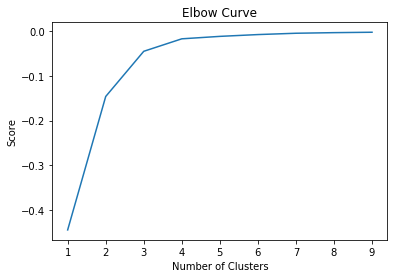

In [54]:
import matplotlib.pyplot as plt
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### As we can see that after Number of Clusters 3 the curve inctreases slowly so n_clusters= 3

In [15]:
n_clusters = 3
kmeans = KMeans(n_clusters , init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,Name,Latitude,Longitude,cluster_label
0,Cafe Sunlight,19.081526,72.881661,1
1,Cafe Coffee Day,19.267693,72.965408,2
2,Plate & Pint French Ristorante,18.965628,72.803645,0
3,KFC,18.972222,72.806385,0
4,Hot Buns,19.259531,72.852945,2
5,The bakery at shalimar,18.972307,72.806259,0
6,Soli,18.972245,72.806343,0
7,bun men,18.971011,72.804687,0
8,Cafeteria,18.971833,72.804981,0
9,Starbucks,19.075523,72.831745,1


In [33]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(X['Latitude'],X['Longitude'],X['Name'],X['cluster_label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [21]:
X[X['cluster_label']==0]

,Name,Latitude,Longitude,cluster_label
2,Plate & Pint French Ristorante,18.965628,72.803645,0
3,KFC,18.972222,72.806385,0
5,The bakery at shalimar,18.972307,72.806259,0
6,Soli,18.972245,72.806343,0
7,bun men,18.971011,72.804687,0
8,Cafeteria,18.971833,72.804981,0
10,The Malabar Hill Club,18.954392,72.803510,0
11,Café Mondegar,18.924219,72.832106,0
19,Hotel Geeta Bhavan,18.945818,72.828304,0
21,Al Rehmani,18.961843,72.831818,0


In [23]:
X[X['cluster_label']==1]

,Name,Latitude,Longitude,cluster_label
0,Cafe Sunlight,19.081526,72.881661,1
9,Starbucks,19.075523,72.831745,1
12,Candies,19.061176,72.826634,1
13,Scrumptiious,19.141126,72.810584,1
14,The Cafe By Foodhall,19.076199,72.834496,1
16,Bangalore Iyengar Bakery,19.019603,73.016081,1
17,Starbucks,19.060640,72.898460,1
18,Oceanic - Seafood Specialty Resturant,19.061558,72.901884,1
20,no 101,19.116998,72.910293,1
25,YUMMY Foods (Vashi Sector - 29),19.087103,73.003379,1


In [24]:
X[X['cluster_label']==2]

,Name,Latitude,Longitude,cluster_label
1,Cafe Coffee Day,19.267693,72.965408,2
4,Hot Buns,19.259531,72.852945,2
15,Yummy Kitchen,19.219096,72.833947,2
22,Pincuk,19.162395,72.990630,2
28,Andawala Egg Cuisine & Veg Chinese,19.218129,72.842030,2
32,McDonald's,19.267968,72.965655,2
37,mahavir nagar,19.213221,72.841385,2
44,Domino's Pizza,19.266000,72.967000,2
